In [13]:
#LIBRARIES 
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# machine learning

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Data pre-processing

In [14]:
df=pd.read_csv('data_arrhythmiacv.csv',delimiter=';')

In [15]:
#identify the target
df.rename(columns={280:'diagnosis'},inplace=True)

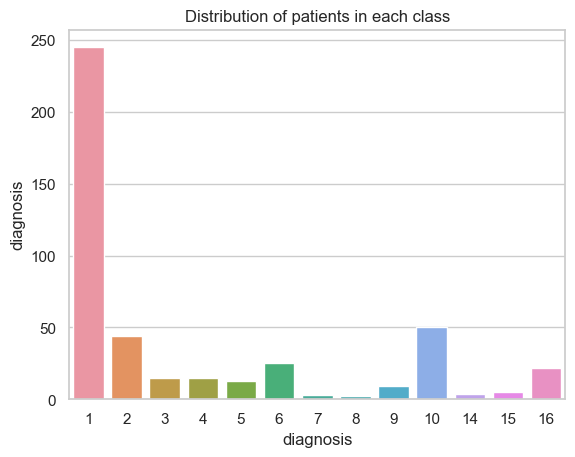

In [16]:
sns.barplot(data=df,x='diagnosis',y='diagnosis', estimator = len)
plt.title('Distribution of patients in each class')
plt.show()

# Binary classification 1/0

In [17]:
df_binary=df.copy()
df_binary.Label=df_binary.diagnosis.apply(lambda x: 0 if x==1 else 1)
df_binary.head(10)

C:\Users\Xu Jiantao\AppData\Local\Temp\ipykernel_5868\3785995654.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_binary.Label=df_binary.diagnosis.apply(lambda x: 0 if x==1 else 1)


,age,sex,height,weight,qrs_duration(ms),p-r_interval(ms),q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0,0.8,0.9,20.1,25.1,10


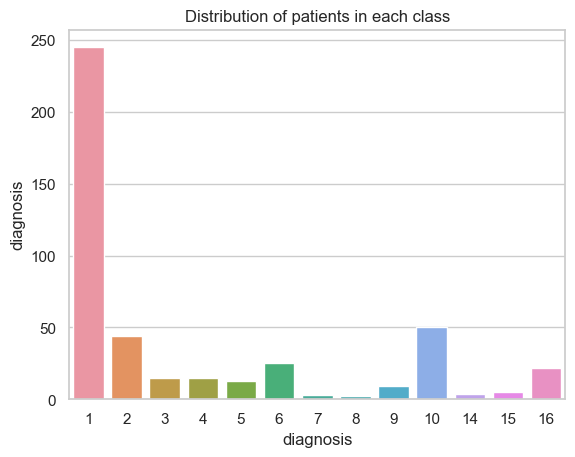

In [18]:
sns.barplot(data=df_binary,x='diagnosis',y='diagnosis', estimator = len)
plt.title('Distribution of patients in each class')
plt.show()

In [19]:
# Get the list of columns with "?" values
cols_with_missing = [col for col in df.columns if df[col].isin(["?"]).any()]
# Print the column names
print("Columns with '?' values:", cols_with_missing)

# Find columns that contain only zeros
cols_with_all_zeros00 = [col for col in df.columns if (df[col] == 0.0).all()]
# Print the column names
print("Columns with all zeros:", cols_with_all_zeros00)

cols_with_missing = df.columns[df.isnull().any()].tolist()
# Print the column names
print("Columns with missing values:", cols_with_missing)

Columns with '?' values: ['T', 'P', 'QRST(ms)', 'J', 'heart_rate(bpm)']
Columns with all zeros: ["S'_wave(ms)", 'CB', 'CD', 'CS', 'EV', 'EY', 'FF', 'FH', 'FJ', 'FL', 'FS', 'FZ', 'GA', "S'_wave(mv)", 'IB', 'KP', 'LC']
Columns with missing values: []


### Processing columns with identical values 

In [20]:
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop.values)
# df.drop(['19', '67', '69', '83', '131', '132', '139', '141', '143', '145', '151', '156', '157', '164', '204', '264', '274','10','11','12','13','14'], axis=1, inplace=True)
df.shape


["S'_wave(ms)" 'CB' 'CD' 'CS' 'EV' 'EY' 'FF' 'FH' 'FJ' 'FL' 'FS' 'FZ' 'GA'
 "S'_wave(mv)" 'IB' 'KP' 'LC']


(452, 280)

### Null values processing 

In [21]:
#find "?" values in each column
#replace each of these value with mean(column.values)
df.info(verbose = True, null_counts = True)

#10 -> 444
#11 -> 430
#12 -> 451
#13 -> 76
#14 -> 451

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 280 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    age               452 non-null    int64  
 1    sex               452 non-null    int64  
 2    height            452 non-null    int64  
 3    weight            452 non-null    int64  
 4    qrs_duration(ms)  452 non-null    int64  
 5    p-r_interval(ms)  452 non-null    int64  
 6    q-t_interval      452 non-null    int64  
 7    t_interval        452 non-null    int64  
 8    p_interval        452 non-null    int64  
 9    qrs               452 non-null    int64  
 10   T                 452 non-null    object 
 11   P                 452 non-null    object 
 12   QRST(ms)          452 non-null    object 
 13   J                 452 non-null    object 
 14   heart_rate(bpm)   452 non-null    object 
 15   q_wave(ms)        452 non-null    int64  
 16   r_wave(ms)        452 no

C:\Users\Xu Jiantao\AppData\Local\Temp\ipykernel_5868\1618446966.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose = True, null_counts = True)


In [22]:
from sklearn.model_selection import train_test_split
#
X_train,X_test,y_train,y_test=train_test_split(df_binary.drop(columns=['diagnosis'],axis=1),df_binary['diagnosis'],test_size=0.2,random_state=1)
#
# X_train['T', 'P', 'QRST(ms)', 'J', 'heart\'_rate(bpm)'] = X_train['T', 'P', 'QRST(ms)', 'J', 'heart\'_rate(bpm)'].fillna(X_train.groupby(y_train)['T', 'P', 'QRST(ms)', 'J', 'heart\'_rate(bpm)'].transform('mean').fillna(X_train[['T', 'P', 'QRST(ms)', 'J', 'heart\'_rate(bpm)']].mean(axis=0)))
#
#
# X_test['T', 'P', 'QRST(ms)', 'J', 'heart\'_rate(bpm)'] = X_test['T', 'P', 'QRST(ms)', 'J', 'heart\'_rate(bpm)'].fillna(X_test.groupby(y_test)['T', 'P', 'QRST(ms)', 'J', 'heart\'_rate(bpm)'].transform('mean').fillna(X_test['T', 'P', 'QRST(ms)', 'J', 'heart\'_rate(bpm)'].mean(axis=0)))



In [23]:
# df.drop(columns = [13], axis = 1, inplace = True)

### Finding relations between features 

AttributeError: 'bool' object has no attribute 'all'

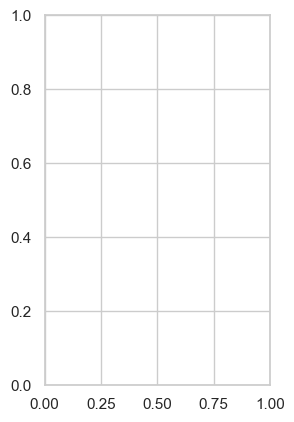

In [24]:
#Relation between Age/Class:
sns.set(style="whitegrid")
plt.subplot(1,2,1)
sns.barplot(data=df_binary,x='diagnosis',y=0)

In [ ]:
#Relation sex/class: 
sns.barplot(data=df_binary,x='diagnosis',y=1)

In [ ]:
sns.boxplot(data=df_binary,x='diagnosis',y=14)
#14= Heart rate: Number of heart beats per minute

## PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=90)
X,y = X_train,y_train
comp = pca.fit_transform(X)
### Displaying data in 2-dimensional space of the 2 principal components
plt.figure(1, figsize =(13, 8))
colors = ['b', 'r']
for l in range(2):
    plt.scatter(comp[y==l][:, 0], comp[y==l][:, 1], c=colors[l], label = 'Class ' + str(l))
plt.legend(loc='best')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('y')


In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Oversampling 

In [ ]:
def oversample(df, labels, r = 3, strategy = 'same'):
    max_size = labels.value_counts().max() 
    lst = [df]
    labels_new = [labels]
    for class_index, group in df.groupby(labels):
        if strategy == 'same':
            n_samples = max_size - len(group)
        else:
            n_samples = min(int(len(group)*r), max_size - len(group))  
        lst.append(group.sample(n_samples, replace=True, random_state = 10))
        labels_new.append(pd.Series(n_samples*[class_index]))
    frame_new = pd.concat(lst)
    labels_new = pd.concat(labels_new)
    return(frame_new, labels_new)

#  MODELS 

## Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

#Model
gnb = GaussianNB()


cv_results = cross_validate(gnb,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

## Logistic Regression 

In [ ]:
#Model
logmodel=LogisticRegression()

cv_results = cross_validate(logmodel,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

### Oversampling with LogRegression

In [ ]:
#oversampling
oversample_data,oversample_target= oversample(X_train,y_train,2, strategy = None)

#Model
logmodel=LogisticRegression()

cv_results = cross_validate(logmodel,oversample_data,oversample_target, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

## KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


#Model
neigh = KNeighborsClassifier(n_neighbors=3)

cv_results = cross_validate(neigh,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

## SVM 

In [ ]:
#Effective in high dimensional spaces.
#Still effective in cases where number of dimensions is greater than the number of samples.

from sklearn import svm

#Model
model=svm.SVC(kernel='poly',degree=2)


cv_results = cross_validate(model,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())



## Decision Tree 

In [ ]:
from sklearn import tree

#Model
clf = tree.DecisionTreeClassifier(random_state=1)

cv_results = cross_validate(clf,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

In [ ]:
#Overfitting

## XGBoost 

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(eta = 0.6, gamma = 1 , max_depth = 5, min_child_weight = 3, reg_lambda = 10,objective='binary:logistic')
cv_results = cross_validate(xgb,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Model 
random_model = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=0)

cv_results = cross_validate(random_model,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

### Oversampling on RandomForest

In [ ]:
#oversampling
oversample_data,oversample_target= oversample(X_train,y_train,2, strategy = None)


#Model
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,
 min_samples_leaf=1,
 min_samples_split =2,
 n_estimators= 100,random_state=1)


cv_results = cross_validate(random_model,oversample_data,oversample_target, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

In [ ]:
## With the previous results, the models with the highest accuracy and best potential are XGboost and Random Forest 

### Parameter tunning with Grid search: Random Forest 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [False],
    'max_depth': [5,20,70],
    'max_features': [40,50,70],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3,4,5],
    'n_estimators': [50, 80, 100, 300]
}

model = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose=2, n_jobs = -1, cv=3)

rf_grid.fit(X_train,y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

## Feature selection with RFECV 

In [ ]:
#RFESV 
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

#Model 
random_model = RandomForestClassifier(random_state=1)
random_model.fit(X_train,y_train)


# Create the RFE object and compute a cross-validated score.
#Model 
random_model = RandomForestClassifier(random_state=1)

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=random_model, step=1, cv=5, scoring='accuracy',verbose=20)
rfecv = rfecv.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
# Optimal number of features: 67 

### Feature selection on Random Forest 

In [ ]:
from sklearn.model_selection import cross_val_score
new_cols = train_binary.columns[np.where(rfecv.support_)]

#Model 
random_model = RandomForestClassifier(bootstrap = False, random_state=1)


print(cross_val_score(random_model,X_train[new_cols],y_train).mean())

In [ ]:
#Model 
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 20,
 max_features= 40,
 min_samples_leaf=3,
 min_samples_split =3,
 n_estimators= 300,random_state=1)

print(cross_val_score(random_model,X_train[new_cols],y_train).mean())

## Feature selection using mutual information

In [ ]:
""" Feature selection using mutual information criteria then in-model feature importance"""
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel
from sklearn.model_selection import cross_validate

def mi_classif_random(X,y):
    discrete = np.where(np.sum(X * (1-X) != 0, axis = 0)==0)
    return(mutual_info_classif(X,y, random_state = 1, discrete_features = discrete))
    
mi_selector = SelectKBest(mi_classif)
mi_selector.fit(X_train,y_train)

thresh = np.linspace(0.01, 0.08, 200)
scores = []

for i in range(200):
    
    if i%10 == 0:
        print('Iteration ', i)
        
    t = thresh[i]
    
    cols = X_train.columns[np.where(mi_selector.scores_ > t)]

    random_model = RandomForestClassifier(bootstrap = False, random_state=1)

    selector = SelectFromModel(random_model, threshold = 'mean')
    selector.fit(X_train[cols], y_train)

    train_X = selector.transform(X_train[cols])

    cv_results = cross_validate(random_model,train_X,y_train, return_train_score = True)
    
    scores.append(cv_results['test_score'].mean())
    
plt.plot(thresh, scores)
plt.show()

t = thresh[np.argmax(np.array(scores))]

print('Best threshold: ', t)
    

#print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
#print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

In [ ]:
cols = X_train.columns[np.where(mi_selector.scores_ > 0.029)]

random_model = RandomForestClassifier(bootstrap = False, 
                                      random_state=1)

selector = SelectFromModel(random_model, threshold = 'mean')
selector.fit(X_train[cols], y_train)

train_X = selector.transform(X_train[cols])

random_model = RandomForestClassifier(bootstrap = False,  random_state=1)

print(train_X.shape)

cv_results = cross_validate(random_model,train_X,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

In [ ]:
cols[selector.get_support()]

### Grid Search on RandomForest model using the previous columns cols 

In [ ]:

random_model = RandomForestClassifier(random_state=1)

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,20,30,50, None],
    'max_features': [10,20,25,'auto'],
    'min_samples_leaf': [1,3, 6, 9],
    'min_samples_split': [2,3,6,9],
    'n_estimators': [80,100,200]
}

model = RandomForestClassifier(random_state = 1)

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose=2, n_jobs = -1, cv=5)

rf_grid.fit(train_X, y_train)  

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
#Model using cols and the previous tuned hyper-paramters 
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,
 min_samples_leaf=1,
 min_samples_split =2,
 n_estimators= 100,random_state=1)


cv_results = cross_validate(random_model,train_X,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

### Grid search with more precise hyper parameters

In [ ]:

param_grid = {
    'max_depth': [6,8,9,10,11,12,None],
    'max_features': [5,7,9,10,12,14],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2,3],
    'n_estimators': [80,90,100,110,120,150]
}

model = RandomForestClassifier(bootstrap = False, random_state = 1)

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose=2, n_jobs = -1, cv=5)

rf_grid.fit(train_X, y_train)  

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,
 min_samples_leaf=1,
 min_samples_split =2,
 n_estimators= 100,random_state=1)


cv_results = cross_validate(random_model,train_X,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

In [ ]:
# No real change to the test cv accuracy >> I choose to stick to these hyper-parameters 

## Testing the final binary classification model

In [ ]:

#other parameters by default 
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,random_state=1)


#Converting to df 
df_train = pd.DataFrame(train_X, columns = cols[selector.get_support()].tolist())

X_test = selector.transform(y_train[cols])
df_test = pd.DataFrame(X_test, columns = cols[selector.get_support()].tolist())
df_test.index = y_test.index

#Model fitting and predicting 
random_model.fit(df_train, y_train)

y_pred = random_model.predict(df_test)
y_pred = pd.Series(y_pred)
y_pred.index = y_test.index

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)

### Learning curve

In [ ]:
from sklearn.model_selection import learning_curve


#Model
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,random_state=1)

sizes, train_scores, test_scores = learning_curve(random_model,train_X, y_train)

plt.figure()
plt.plot(sizes, np.mean(train_scores, axis = 1), label = 'Training curve')
plt.plot(sizes, np.mean(test_scores, axis = 1), label = 'Testing curve')
plt.title('Learning curve')
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend(loc='best')
plt.show()

## Shap visualizations 

In [ ]:
feature_stat = pd.concat([df_train.mean(), df_train.std()], axis = 1)
feature_stat.columns = ['mean','std']
feature_stat

## Visualize the features leading to false negatives using SHAP  

In [ ]:
#shap 
import shap
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,random_state=1)

random_model.fit(df_train, y_train)

explainer = shap.TreeExplainer(random_model)
shap_values = explainer.shap_values(df_train, y = y_train, check_additivity = False)
shap.summary_plot(shap_values[1], df_train)

In [ ]:
test_shap_values = explainer.shap_values(df_test, y = y_test, check_additivity = False)

df_shap = pd.DataFrame(test_shap_values[1])
df_shap.index = df_test.index

#false negatives 
index = df_test[(y_pred == 0) & (y_test == 1)].index.tolist()

i = index[9]
 
print("Real target value: ", y_test.loc[i])
feature_names = list(map(str,df_train.columns.tolist()))
shap.force_plot(explainer.expected_value[1], df_shap.loc[i,:].values, df_test.loc[i,:].values , feature_names = feature_names,  matplotlib = True)

In [ ]:
shap.initjs()

# True Positive and False Positive for label 1:
TP    = df_test[(y_pred == 1) & (y_test == 1)].index.tolist()
FP    = df_test[(y_pred == 1) & (y_test == 0)].index.tolist()

# Explaining a True Positive example:
x  = df_test.loc[TP[2],:]

explainer = shap.TreeExplainer(random_model, df_train)

TP_TN = df_test[y_pred == y_test].index.tolist()
shap_values = explainer.shap_values(df_test.loc[TP_TN,:], check_additivity=False)
shap.force_plot(explainer.expected_value[1], shap_values[1],df_test.loc[TP_TN,:],feature_names=df_train.columns)


In [ ]:
# With this plot we gather every information we could've had with the previous ones. 

# XGBoost 

### With feature selection

In [ ]:
xgb = XGBClassifier(eta = 0.3, gamma = 1.2 , max_depth = 4, objective='binary:logistic', min_child_weight = 3, reg_lambda = 12, subsample=1,scale_pos_weight=1.9
                   )
cv_results = cross_validate(xgb,df_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

### On the test set

In [ ]:
xgb = XGBClassifier(eta = 0.3, gamma = 1.2 , max_depth = 4, min_child_weight = 3, reg_lambda = 12)
xgb.fit(df_train, y_train)
preds = xgb.predict(df_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

## Grid search for XGBoost 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'eta' : [0.80,1],
    'gamma' : [0.3,0.8,1.2,1.3], 
    'max_depth': [2,4,5], 
    'min_child_weight' : [3,3.3,3.5], 
    'reg_lambda' : [1,5,8,12],
    'subsample':[0.85,1],
    'scale_pos_weight':[1,1.4,1.6]
}

model = XGBClassifier()

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose=2, n_jobs = -1, cv=5)

rf_grid.fit(df_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
xgb = XGBClassifier(eta = 0.1, gamma = 0.5 , max_depth = 2, objective='binary:logistic', min_child_weight = 3.3, reg_lambda = 1, subsample=1,scale_pos_weight=1.4
                   )
cv_results = cross_validate(xgb,df_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

In [ ]:
xgb = XGBClassifier(eta = 0.1, gamma = 0.5 , max_depth = 2, objective='binary:logistic', min_child_weight = 3.3, reg_lambda = 1, subsample=1,scale_pos_weight=1.4
                   )
xgb.fit(df_train, y_train)
preds = xgb.predict(df_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

In [ ]:
# Better accuracy on the testing set using manually-selected parameters
#The issue is still the same: the size of the test set is too small 
#supposing we have almost 0.5 chance of predicting 1, the confidence interval is around 0.1 which is very high 